Using Chan-Vese Segmentation on unedited supplied images

Importing relevant libraries

In [20]:
import os
import skimage as ski
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.color import rgb2gray



In [21]:
# import required module
import os
# assign directory
directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\Circular Crops\SiHa_Looping_Set'

Displaying images in directory

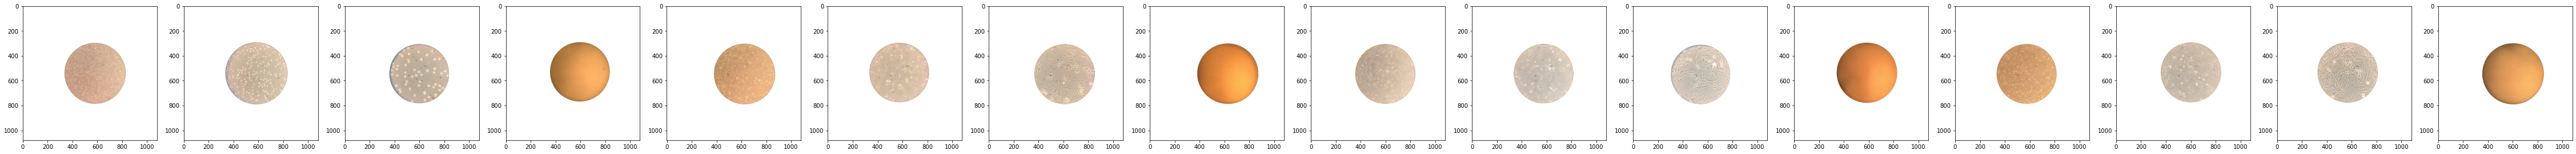

In [22]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory of importance
directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\Circular Crops\SiHa_Looping_Set'

# List to hold all images
images = []

# Show all images in the directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)

    # Checking if image file is eligible
    if os.path.isfile(f):
        img = mpimg.imread(f)  # Load the image
        images.append(img)  # Append the image to the list

# Display all images side-by-side
num_images = len(images)
fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))  # Adjust figsize as needed

for ax, img in zip(axes, images):
    ax.imshow(img)

plt.show()

Chan-Vese Segmentation Loop w/ Gaussian Filter and Lens Flare Reduction

Files in directory: ['D0-T25 - 10x.JPG', 'D0-T25 - 20x.JPG', 'D0-T25 - 40x.JPG', 'D0-T25 - 4x.JPG', 'D1-T25 - 10x.JPG', 'D1-T25 - 20x.JPG', 'D1-T25 - 40x.JPG', 'D1-T25 - 4x.JPG', 'D2-T25 - 10x.JPG', 'D2-T25 - 20x.JPG', 'D2-T25 - 40x.JPG', 'D2-T25 - 4x.JPG', 'D3-T25 - 10x.JPG', 'D3-T25 - 20x.JPG', 'D3-T25 - 40x.JPG', 'D3-T25 - 4x.JPG']
Filtered image files: ['D0-T25 - 10x.JPG', 'D0-T25 - 20x.JPG', 'D0-T25 - 40x.JPG', 'D0-T25 - 4x.JPG', 'D1-T25 - 10x.JPG', 'D1-T25 - 20x.JPG', 'D1-T25 - 40x.JPG', 'D1-T25 - 4x.JPG', 'D2-T25 - 10x.JPG', 'D2-T25 - 20x.JPG', 'D2-T25 - 40x.JPG', 'D2-T25 - 4x.JPG', 'D3-T25 - 10x.JPG', 'D3-T25 - 20x.JPG', 'D3-T25 - 40x.JPG', 'D3-T25 - 4x.JPG']


<ipython-input-36-36093229edc9>:13: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray_image = rgb2gray(image)
<ipython-input-36-36093229edc9>:59: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray_img = rgb2gray(img_as_float(img))


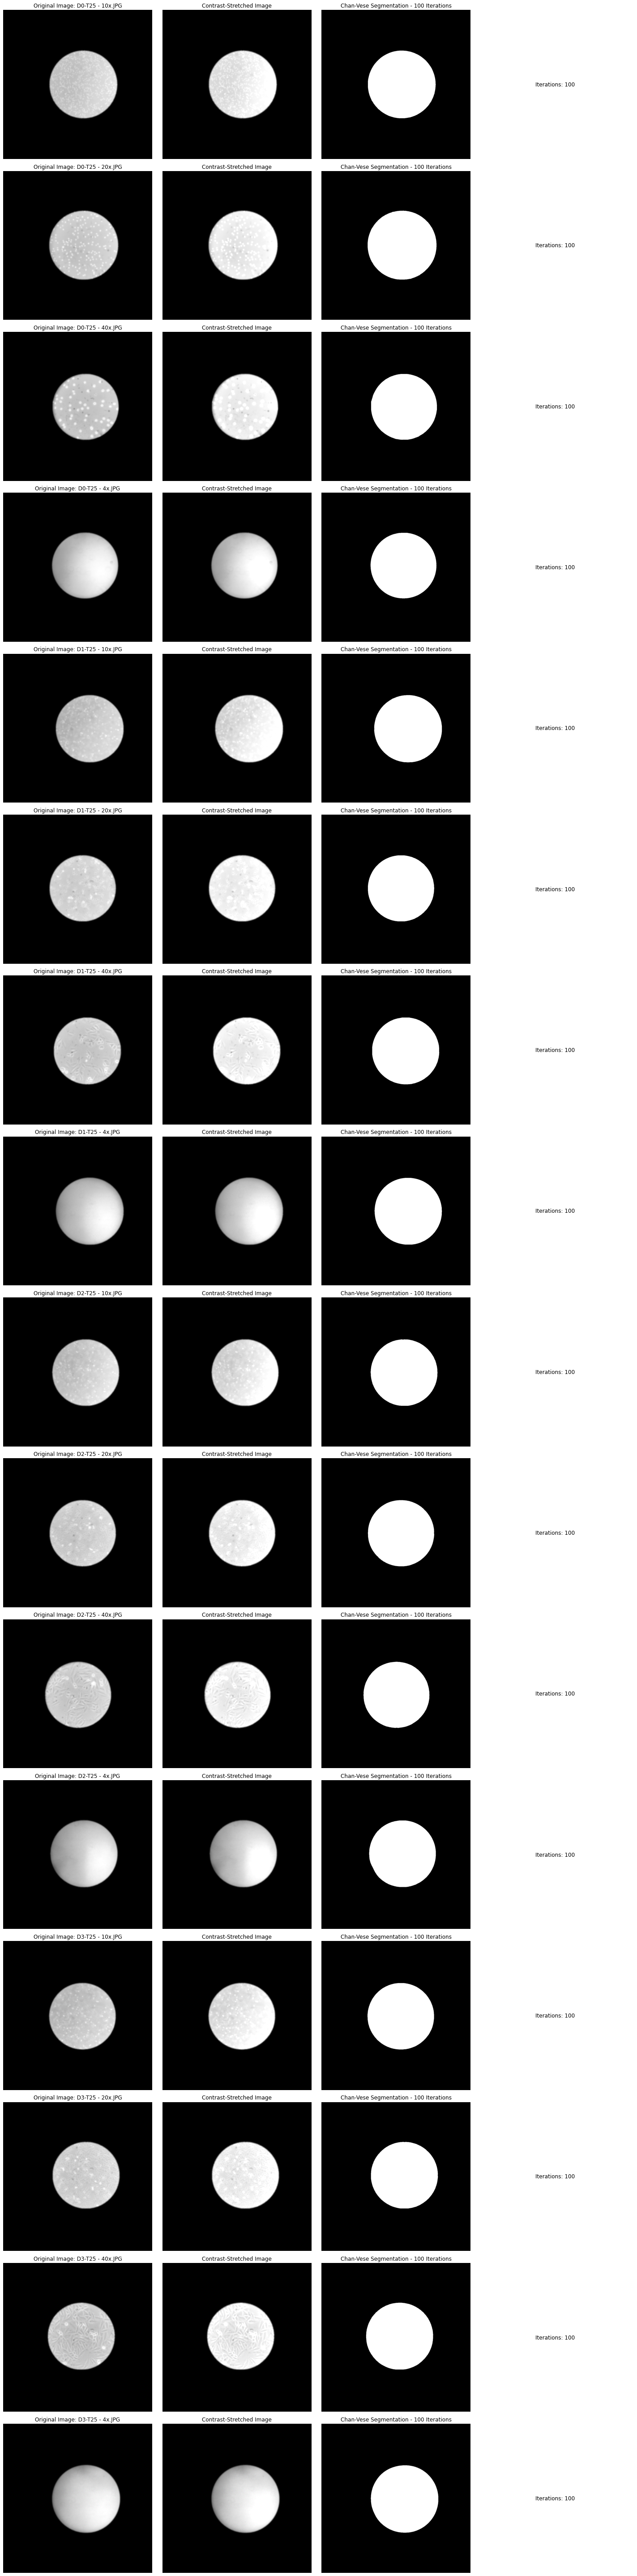

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import img_as_float
from skimage.segmentation import chan_vese
from skimage.restoration import inpaint
from skimage import filters, exposure
import matplotlib.image as mpimg

# Function to reduce lens flare and noise
def reduce_lens_flare_and_noise(image):
    gray_image = rgb2gray(image)
    bright_mask = gray_image > 0.9  # Adjust threshold as necessary
    smoothed_image = filters.gaussian(image, sigma=3, multichannel=True)
    inpainted_image = inpaint.inpaint_biharmonic(smoothed_image, bright_mask, multichannel=True)
    return inpainted_image

# Function to create a circular mask
def circular_mask(shape, center, radius):
    Y, X = np.ogrid[:shape[0], :shape[1]]
    mask = (X - center[1])**2 + (Y - center[0])**2 <= radius**2
    return mask

# Function for contrast stretching
def contrast_stretching(image):
    """Apply contrast stretching to the image."""
    p2, p98 = np.percentile(image, (2, 98))  # Get the 2nd and 98th percentiles
    stretched = exposure.rescale_intensity(image, in_range=(p2, p98))  # Stretch the contrast
    return stretched

# Directory containing the images
directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\Circular Crops\SiHa_Looping_Set'

# Get list of image files
image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and f.endswith(('.png', '.JPG', '.jpeg', '.gif'))]

# Print the contents of the directory for debugging
print("Files in directory:", os.listdir(directory))
print("Filtered image files:", image_files)

# Check if there are any images
if not image_files:
    print("No images found in the specified directory.")
else:
    # Create a figure for displaying images
    fig, axes = plt.subplots(len(image_files), 4, figsize=(20, 5 * len(image_files)))

    for i, filename in enumerate(image_files):
        img_path = os.path.join(directory, filename)
        
        # Load the image
        img = mpimg.imread(img_path)
        
        # Reduce lens flare and noise
        img = reduce_lens_flare_and_noise(img)

        # Convert to float and grayscale
        gray_img = rgb2gray(img_as_float(img))

        # Apply contrast stretching
        stretched_img = contrast_stretching(gray_img)

        # Create circular mask
        height, width = gray_img.shape
        center = (height // 2, width // 2)  # Center of the circle
        radius = 500  # Adjust radius as needed
        mask = circular_mask(gray_img.shape, center, radius)

        # Apply the mask to the grayscale image
        masked_gray_img = np.zeros_like(gray_img)
        masked_gray_img[mask] = gray_img[mask]

        # Ensure the masked area is not completely zero (to avoid issues)
        if np.count_nonzero(mask) == 0:
            print(f"No valid mask area in {filename}. Skipping...")
            continue

        # Compute Chan-Vese segmentation within the masked area
        chanvese_gray_img = chan_vese(masked_gray_img, max_iter=100, extended_output=True)

        # Plot original image
        axes[i, 0].imshow(gray_img, cmap="gray")
        axes[i, 0].set_title("Original Image: {}".format(filename))
        axes[i, 0].axis('off')

        # Plot contrast-stretched image
        axes[i, 1].imshow(stretched_img, cmap="gray")
        axes[i, 1].set_title("Contrast-Stretched Image")
        axes[i, 1].axis('off')

        # Plot segmented image
        axes[i, 2].imshow(chanvese_gray_img[0], cmap="gray")
        axes[i, 2].set_title("Chan-Vese Segmentation - {} Iterations".format(len(chanvese_gray_img[2])))
        axes[i, 2].axis('off')

        # Optionally, display the number of iterations or other details
        axes[i, 3].text(0.5, 0.5, "Iterations: {}".format(len(chanvese_gray_img[2])), fontsize=12, ha='center', va='center')
        axes[i, 3].axis('off')

    plt.tight_layout()
    plt.show()

Thresholding Segmentation Loop

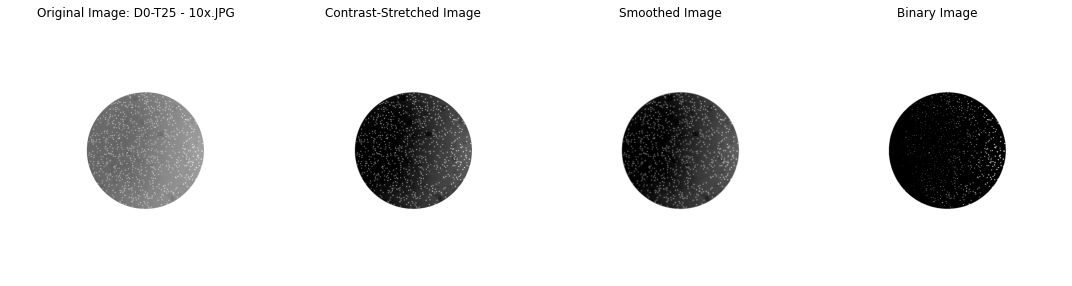

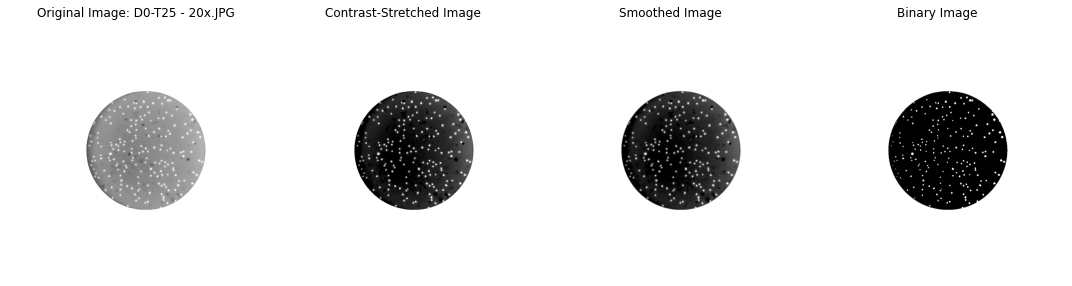

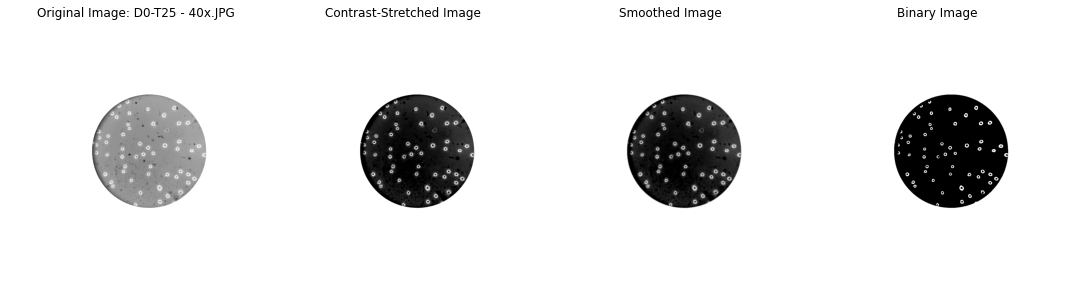

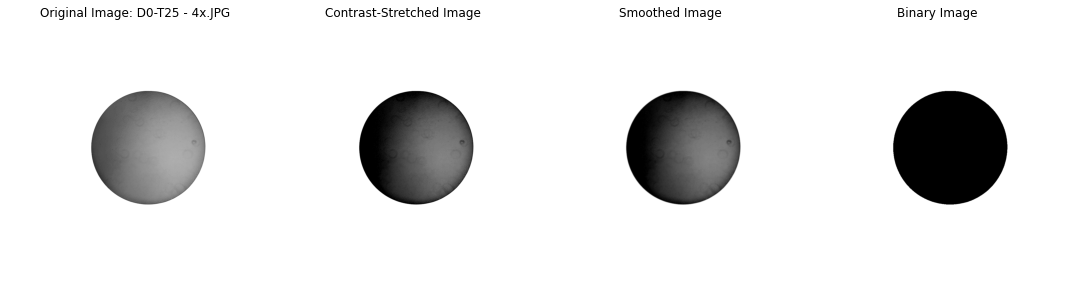

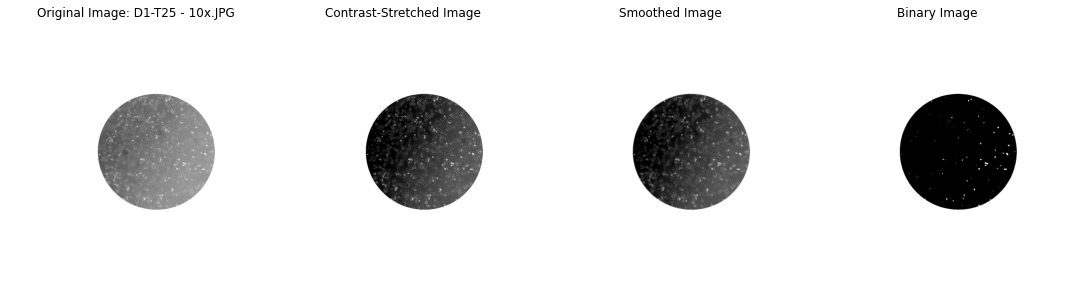

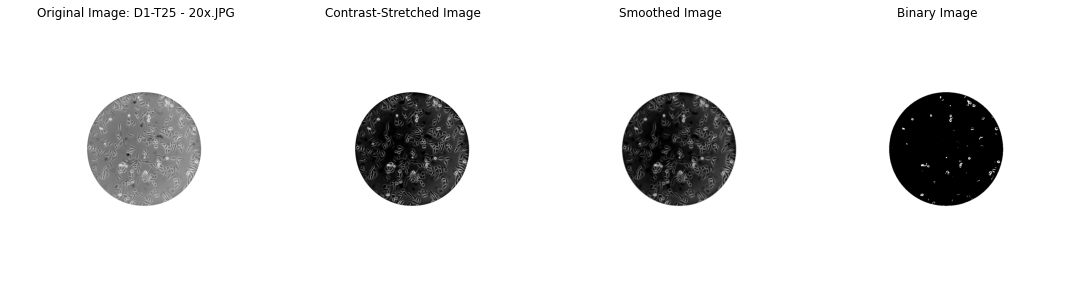

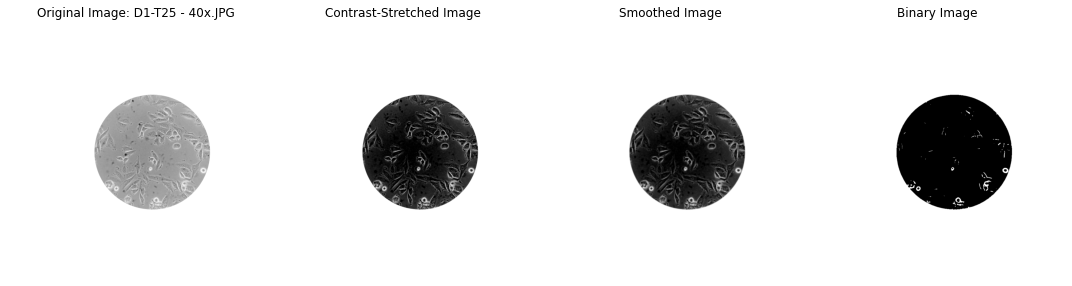

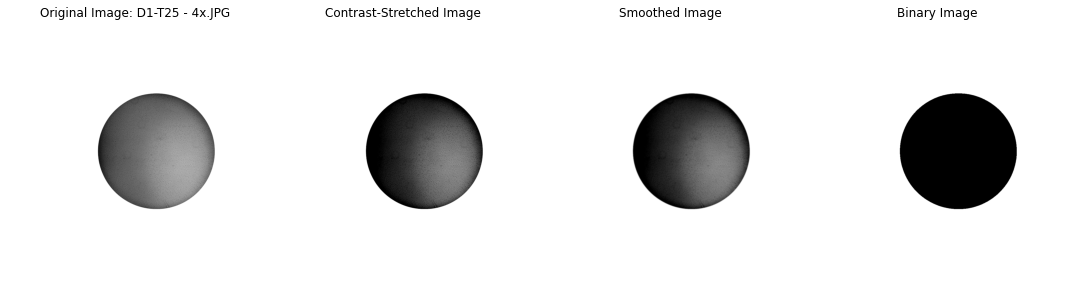

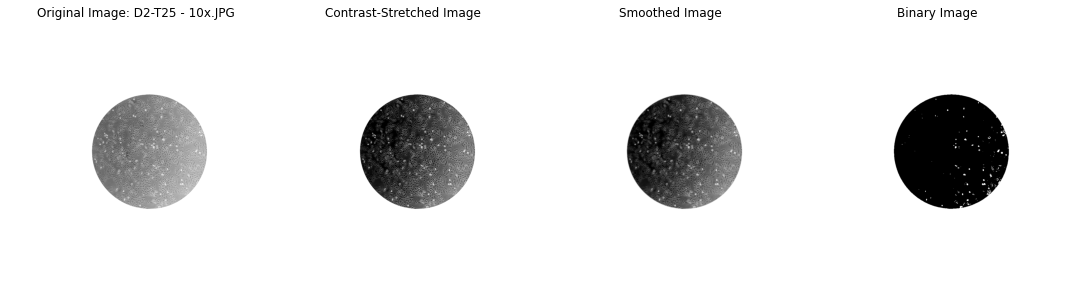

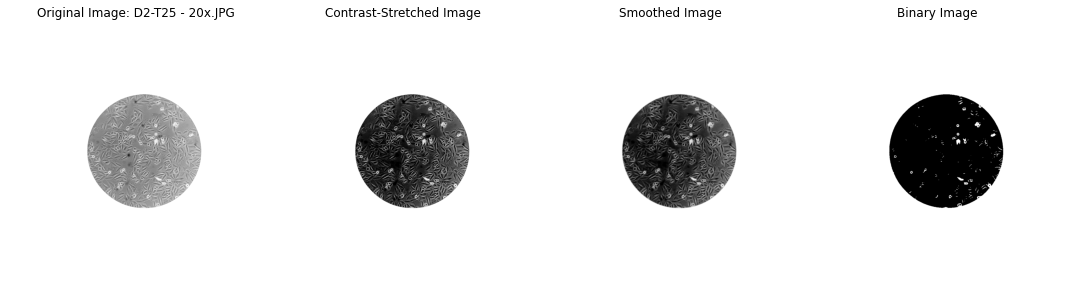

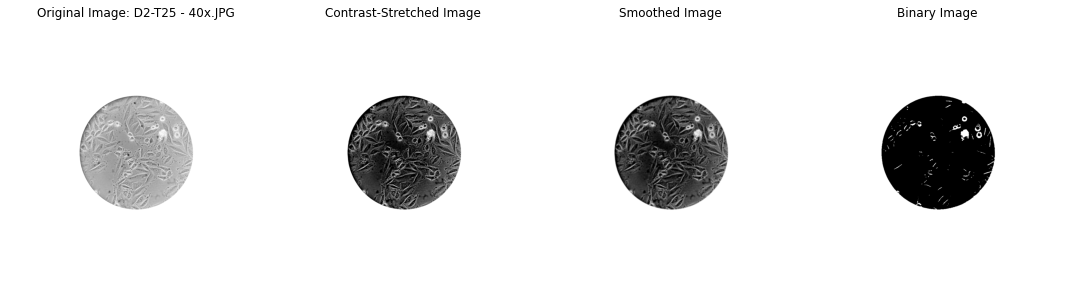

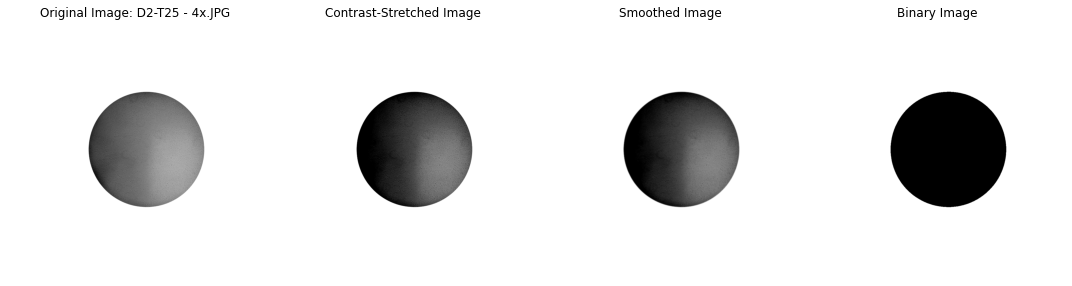

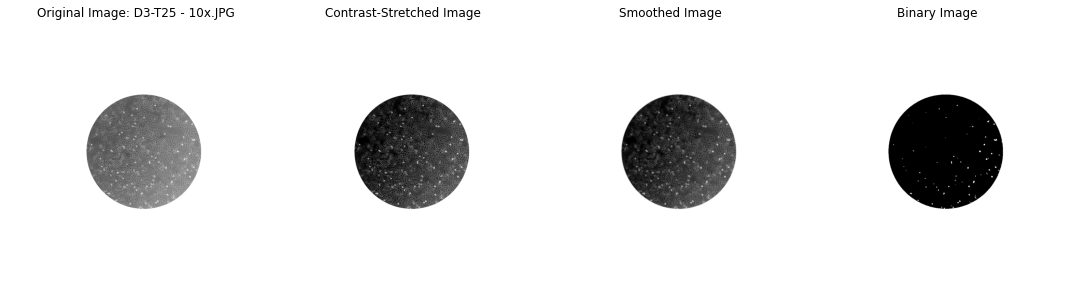

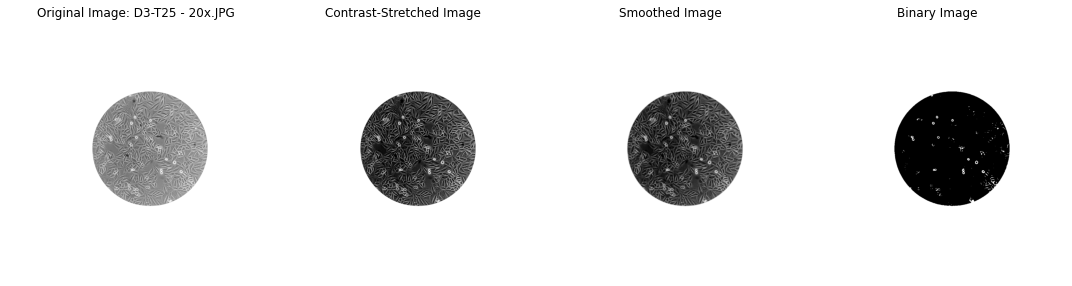

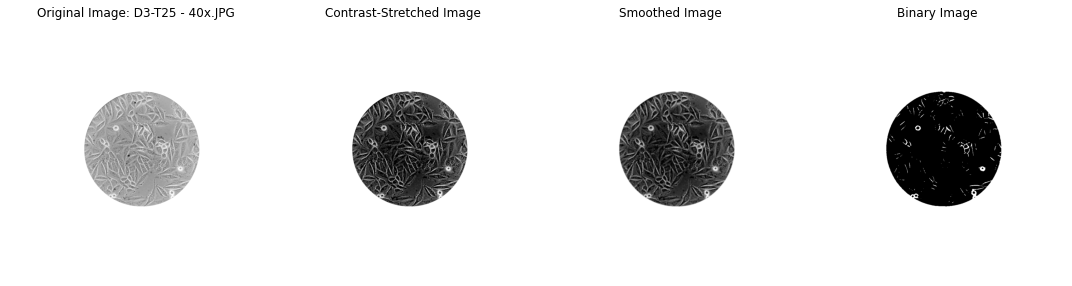

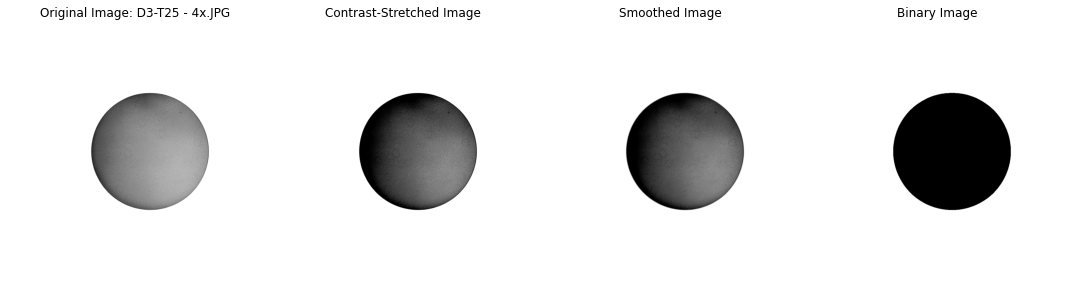

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, exposure

# Function for contrast stretching
def contrast_stretching(image):
    """Apply contrast stretching to the image."""
    p2, p98 = np.percentile(image, (2, 98))  # Get the 2nd and 98th percentiles
    stretched = exposure.rescale_intensity(image, in_range=(p2, p98))  # Stretch the contrast
    return stretched

# Directory containing the images
directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\Circular Crops\SiHa_Looping_Set'

# Get list of image files
image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

# Check if there are any images
if not image_files:
    print("No images found in the specified directory.")
else:
    for filename in image_files:
        img_path = os.path.join(directory, filename)
        
        # Load the image as grayscale
        image = io.imread(img_path, as_gray=True)

        # Apply contrast stretching
        stretched_image = contrast_stretching(image)

        # Apply Gaussian filter to reduce noise
        smoothed_image = filters.gaussian(stretched_image, sigma=1)  # Adjust sigma as needed

        # Apply threshold
        thresh = filters.threshold_otsu(smoothed_image)
        binary = smoothed_image > thresh

        # Show the results
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 4, 1)
        plt.title('Original Image: {}'.format(filename))
        plt.imshow(image, cmap='gray')
        plt.axis('off')  # Hide axes

        plt.subplot(1, 4, 2)
        plt.title('Contrast-Stretched Image')
        plt.imshow(stretched_image, cmap='gray')
        plt.axis('off')  # Hide axes

        plt.subplot(1, 4, 3)
        plt.title('Smoothed Image')
        plt.imshow(smoothed_image, cmap='gray')
        plt.axis('off')  # Hide axes

        plt.subplot(1, 4, 4)
        plt.title('Binary Image')
        plt.imshow(binary, cmap='gray')
        plt.axis('off')  # Hide axes

        plt.tight_layout()
        plt.show()

Region-Based Segmentation Loop

<ipython-input-34-55a2b5de9f74>:29: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray_img = color.rgb2gray(img)


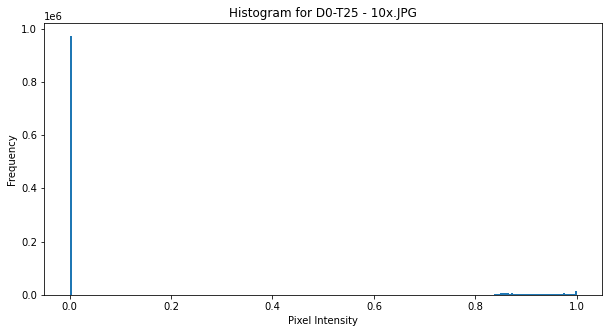

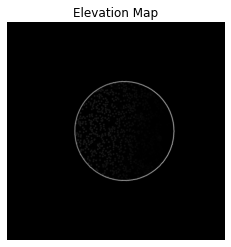

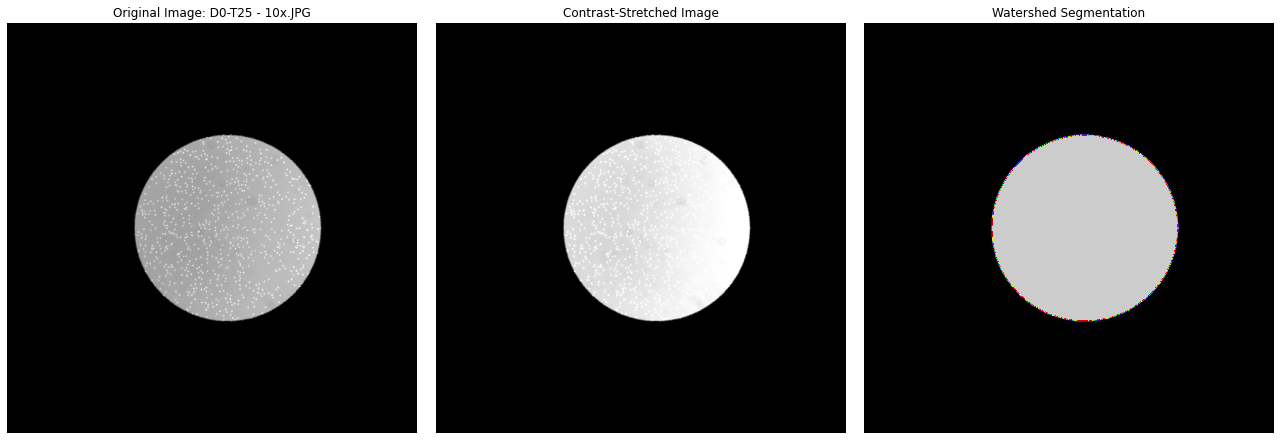

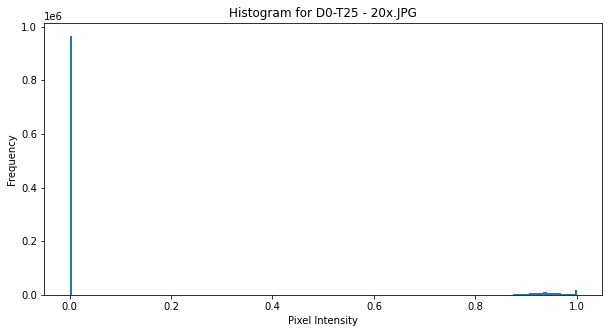

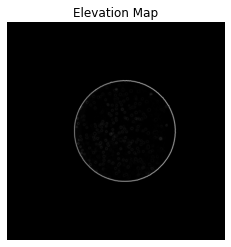

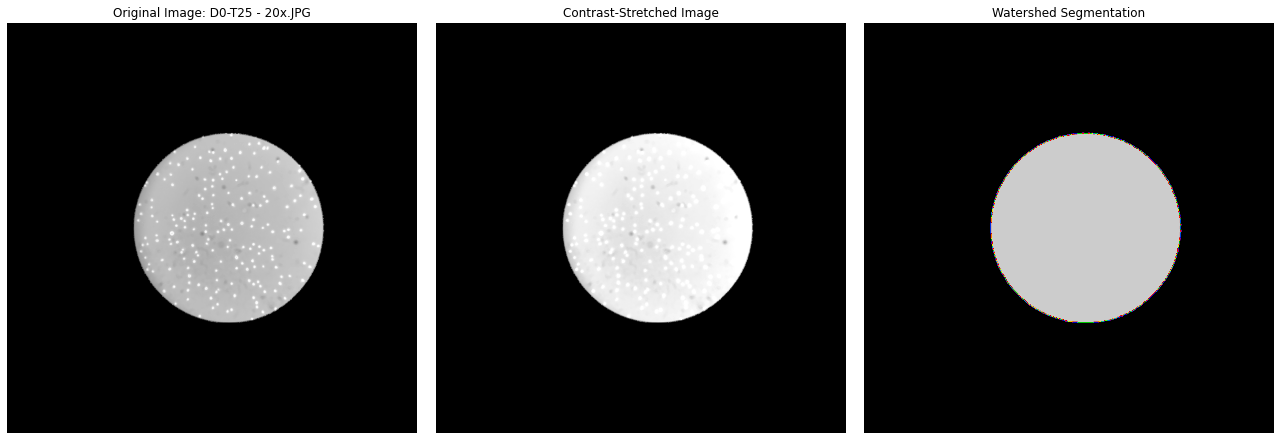

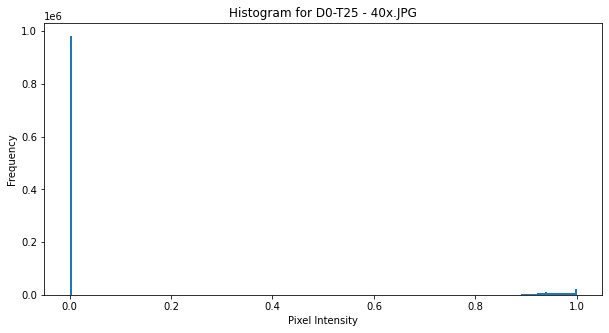

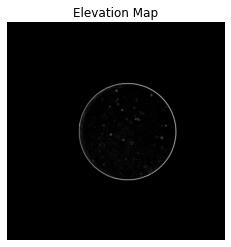

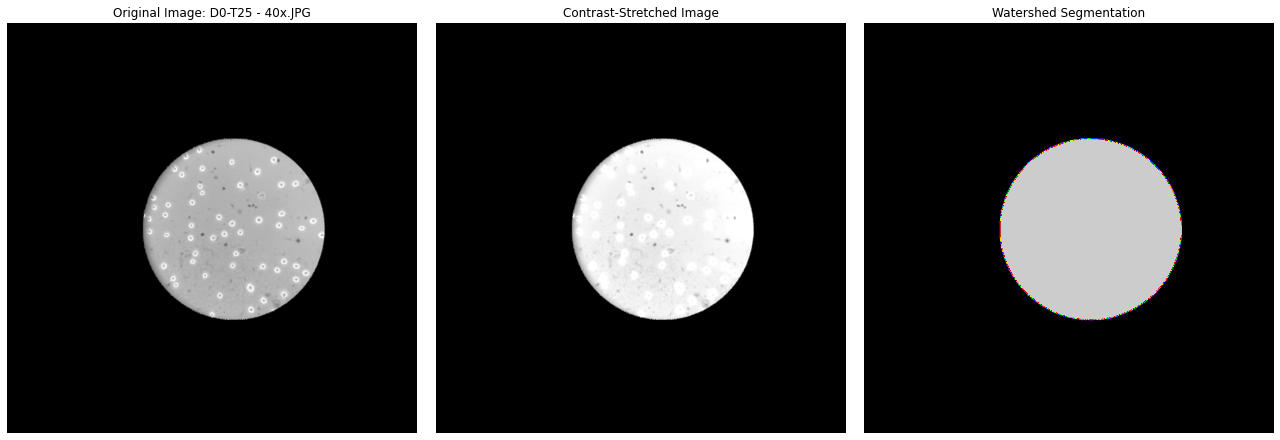

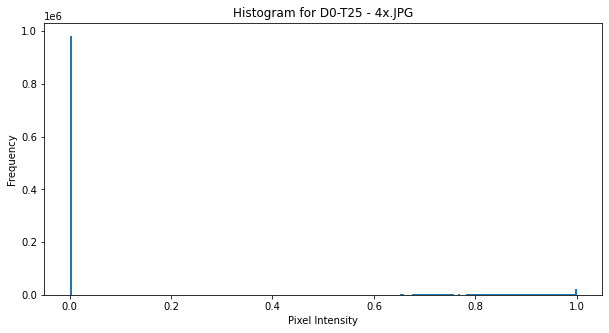

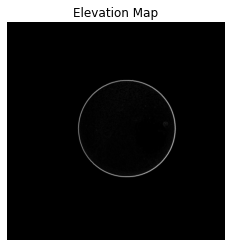

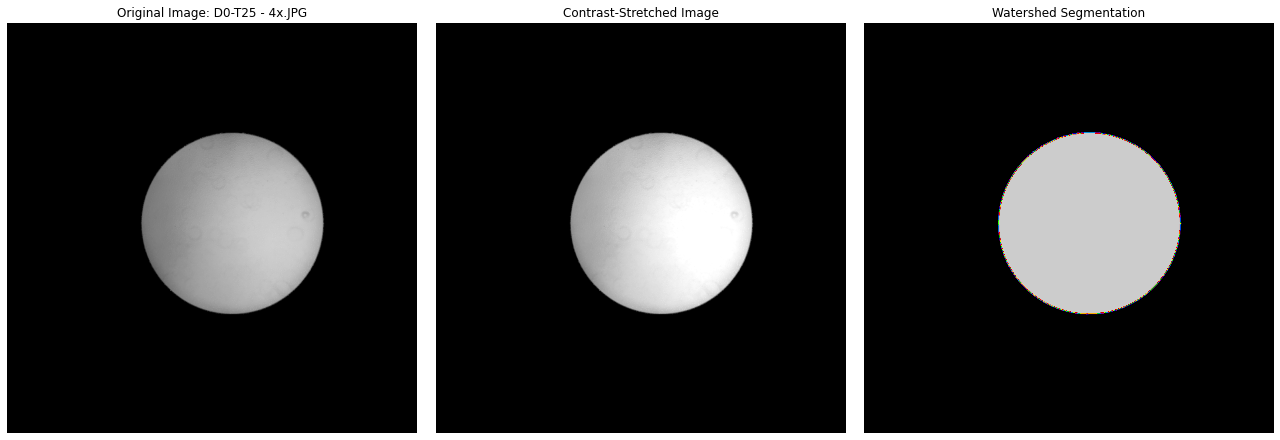

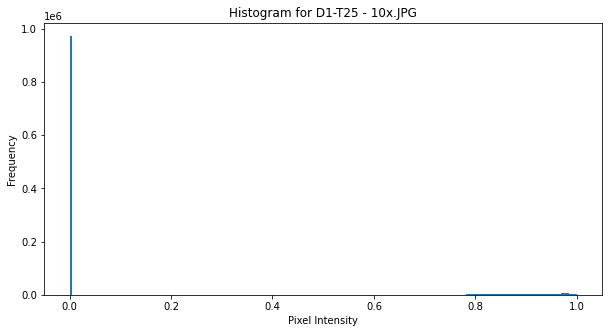

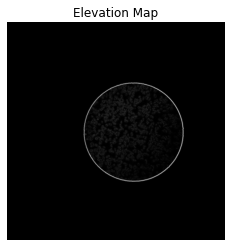

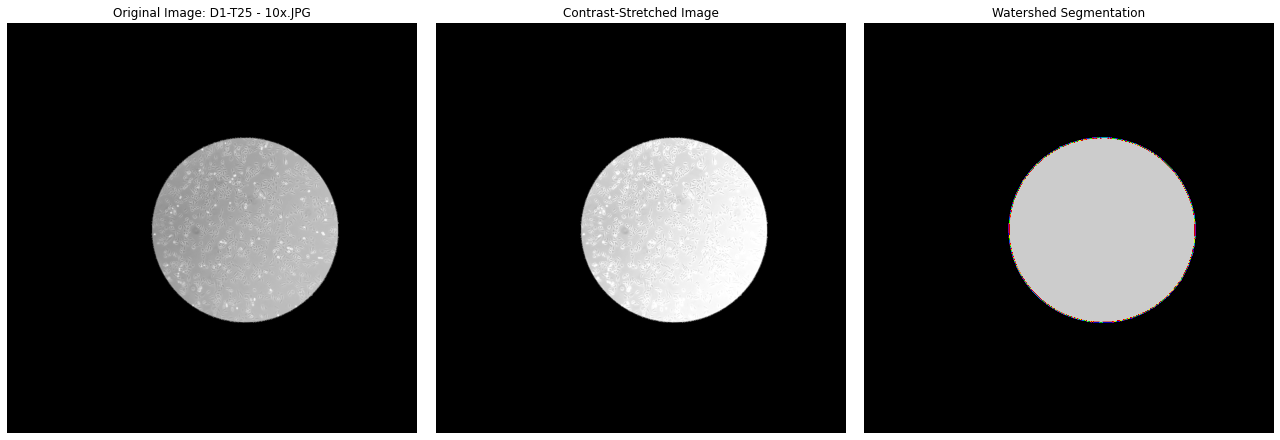

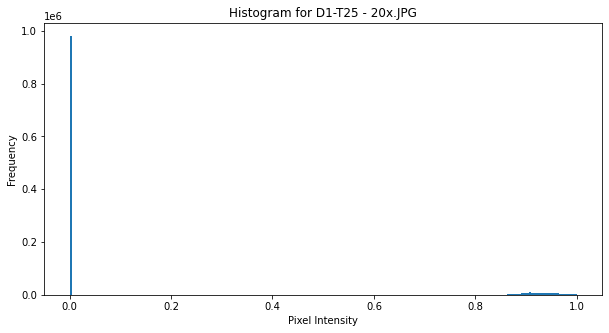

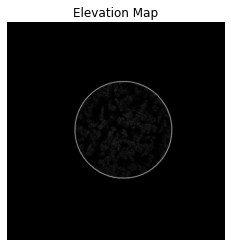

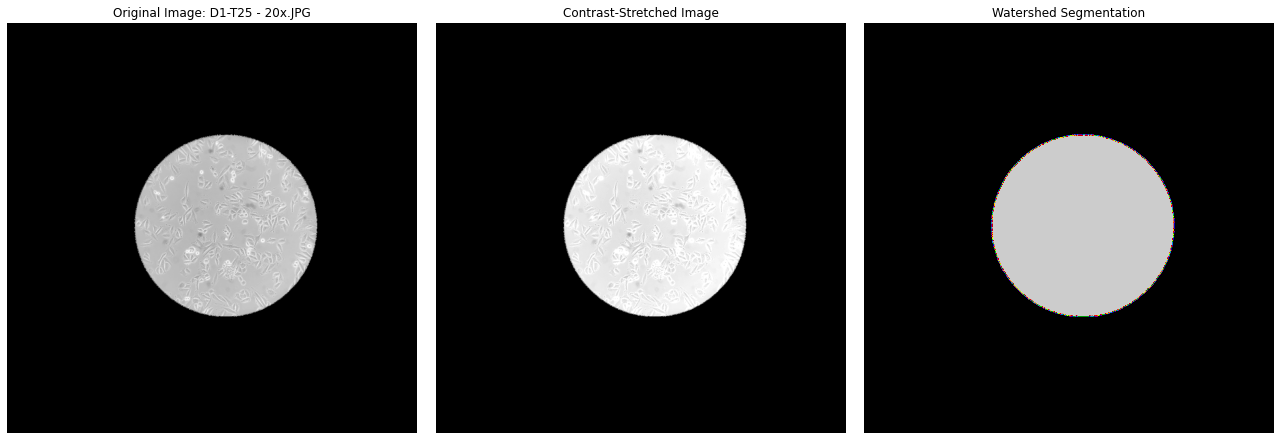

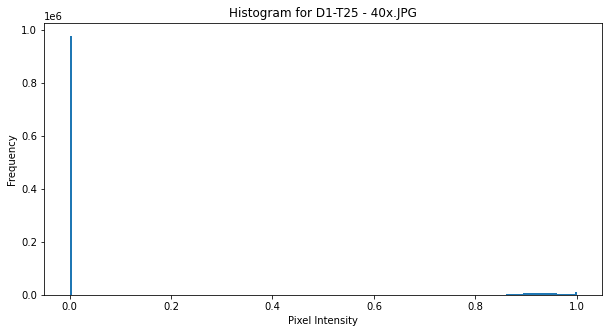

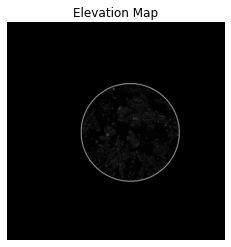

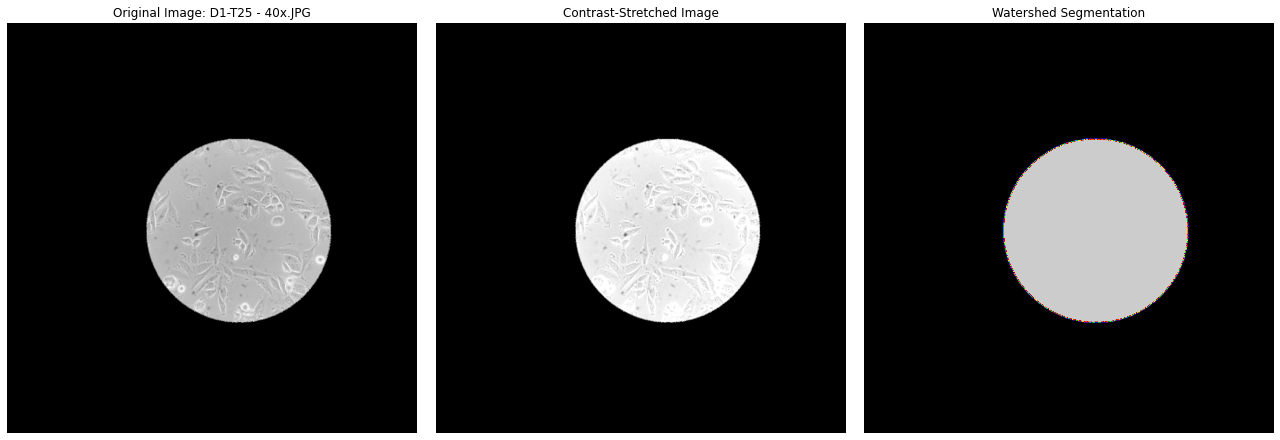

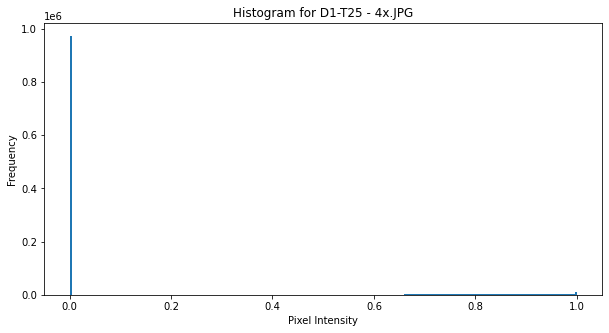

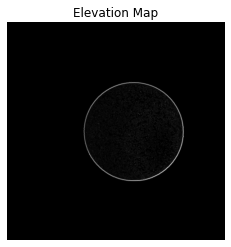

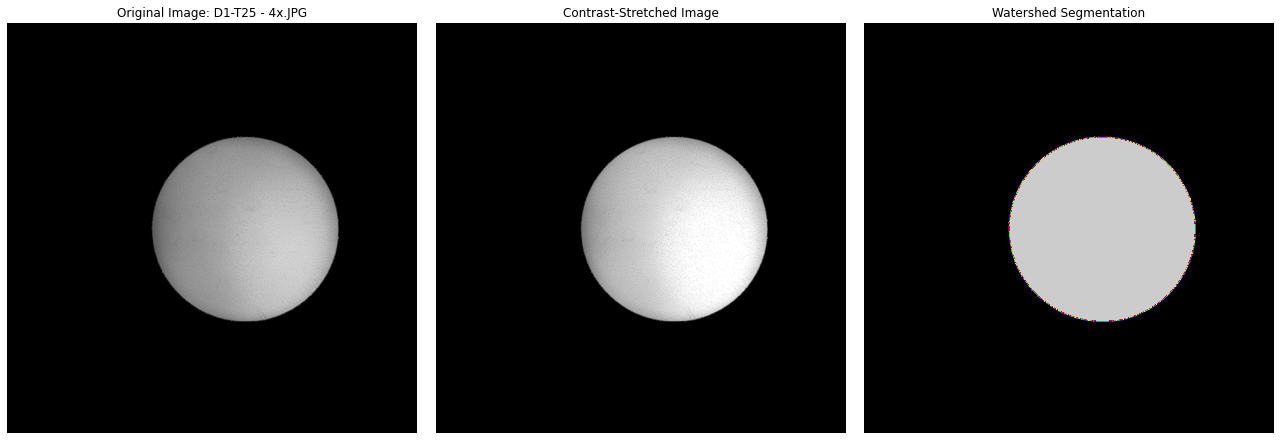

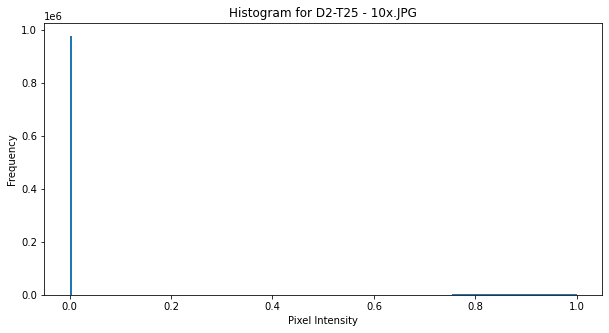

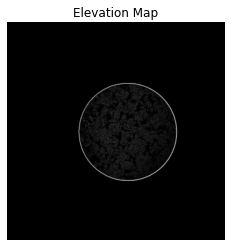

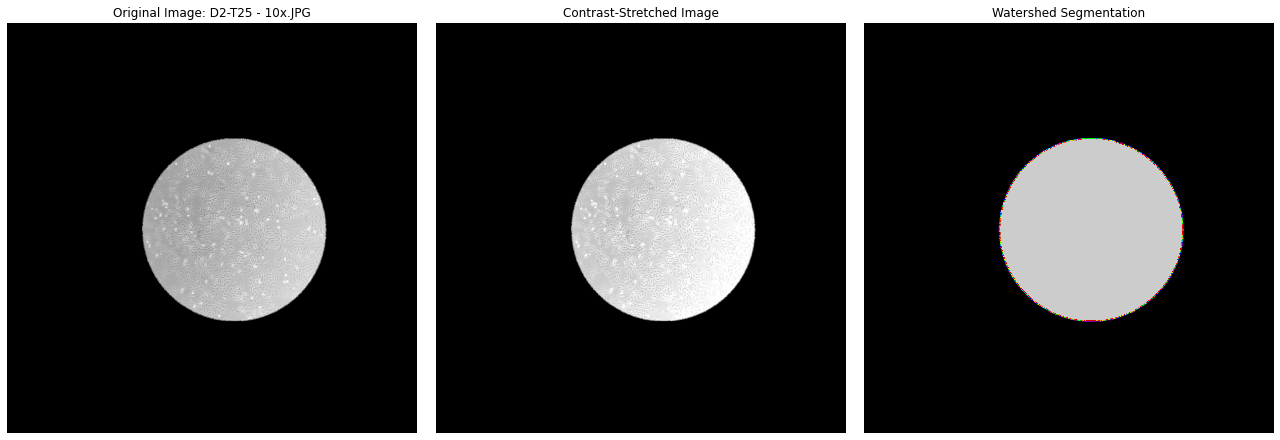

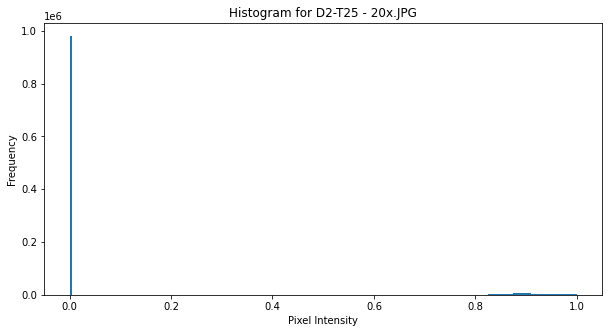

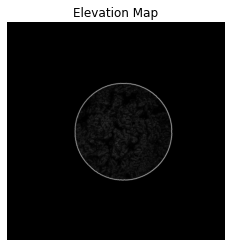

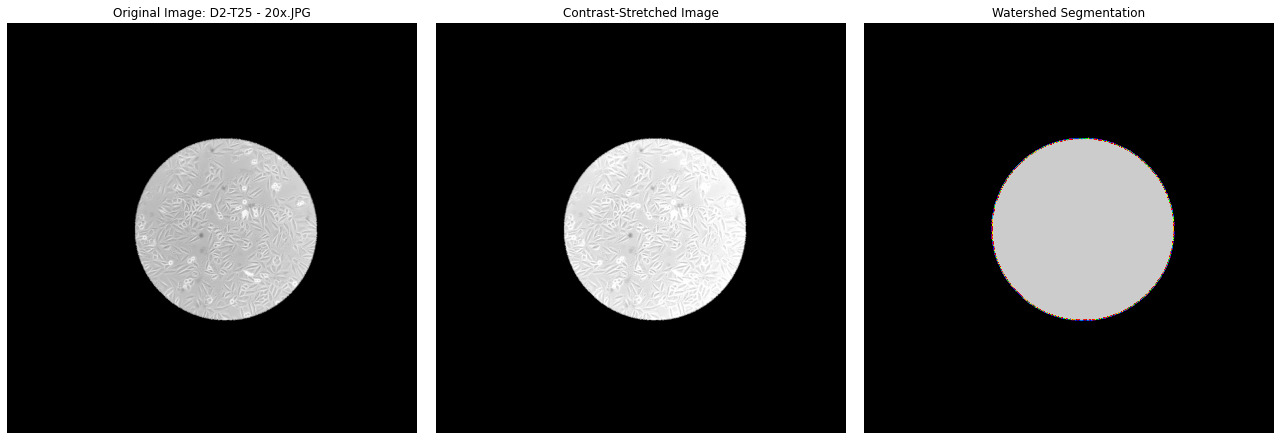

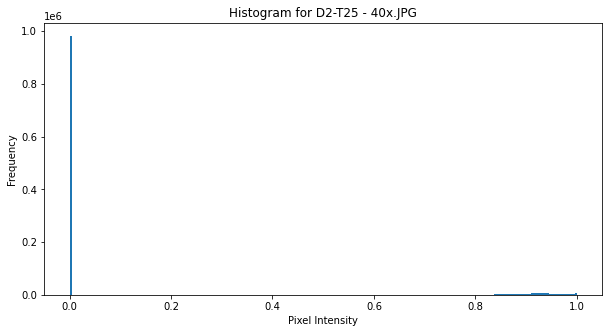

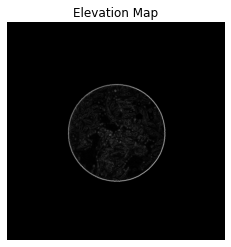

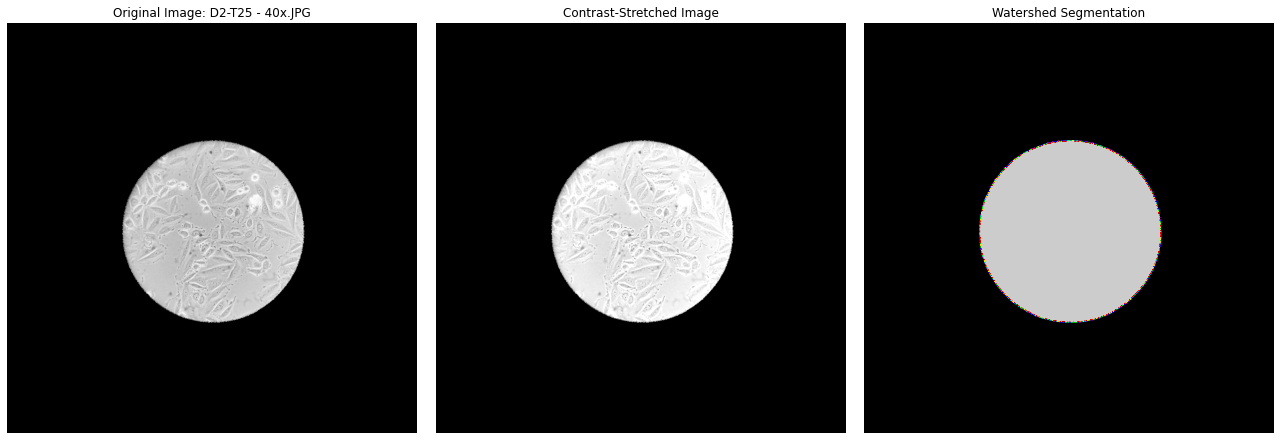

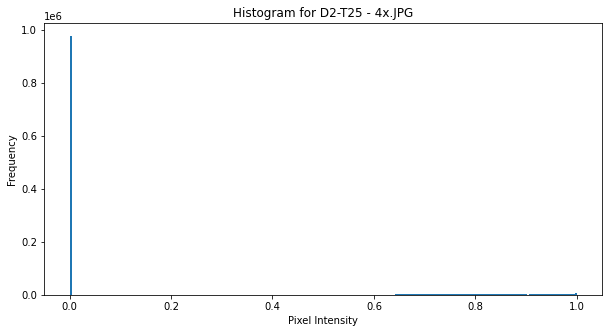

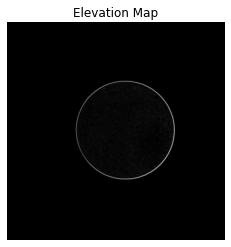

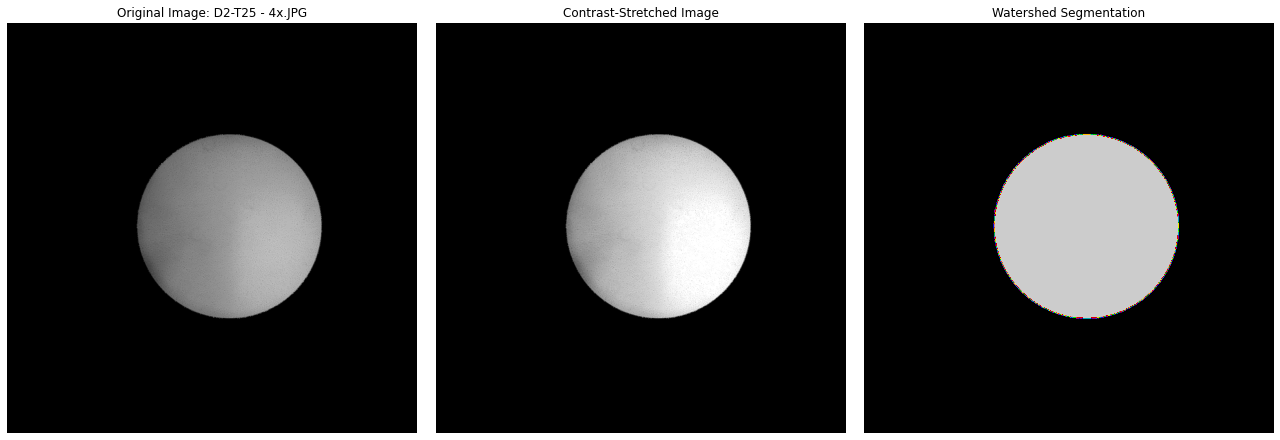

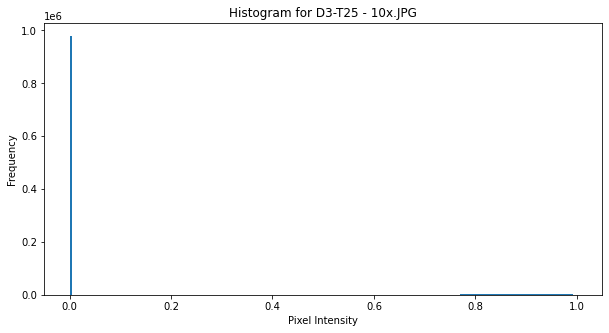

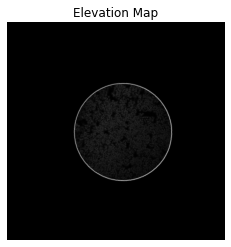

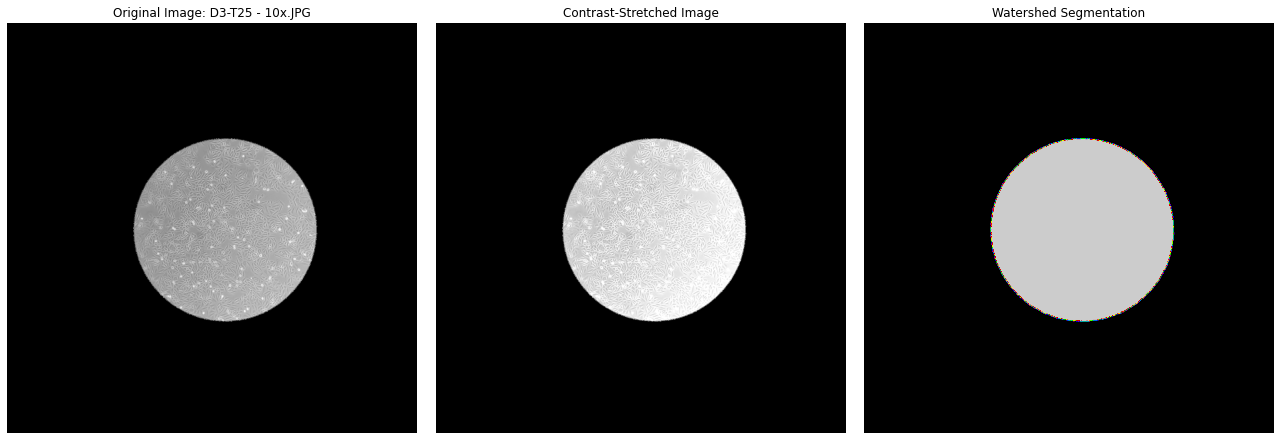

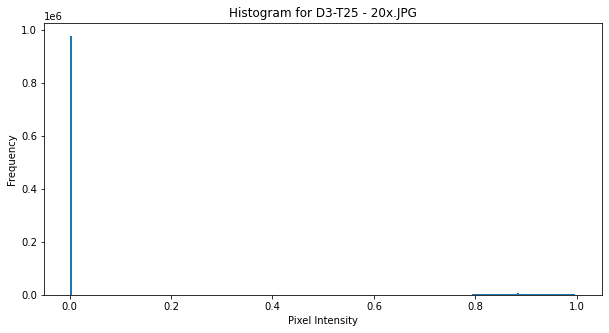

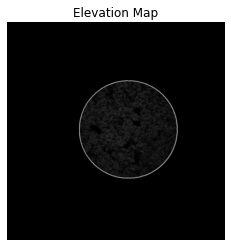

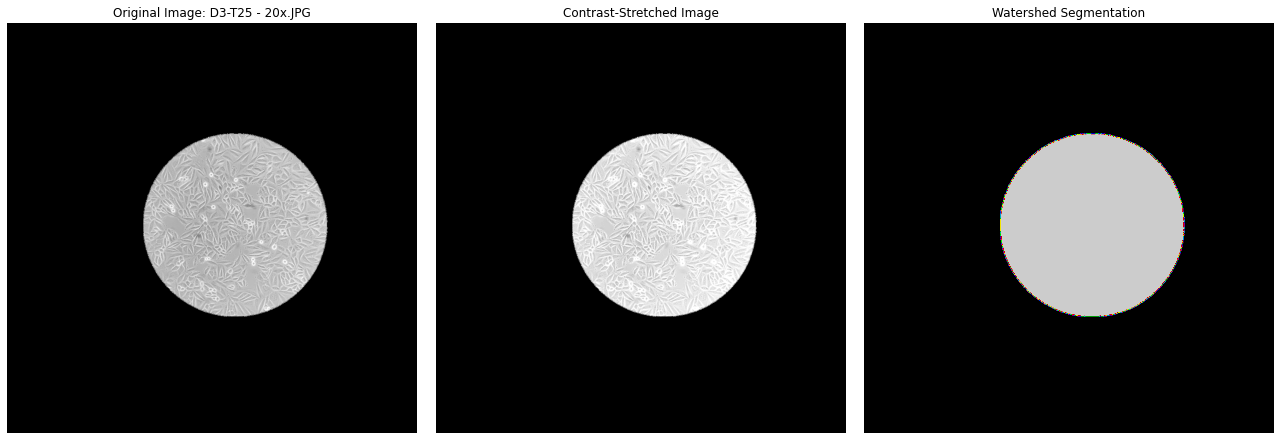

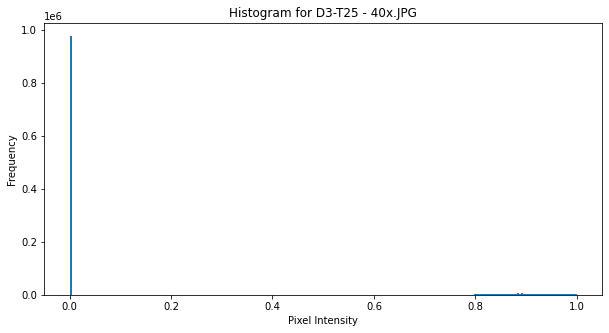

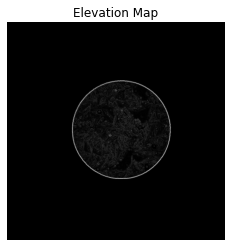

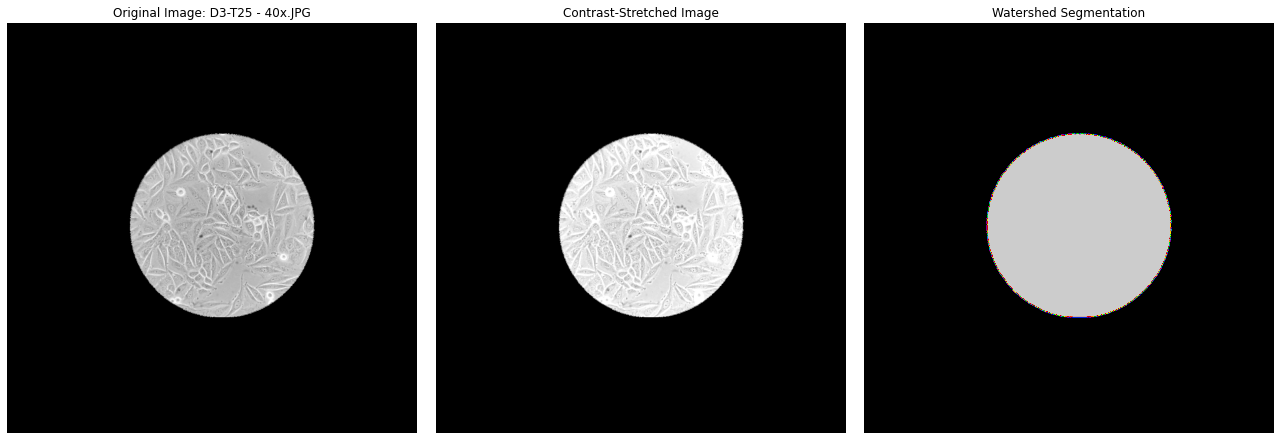

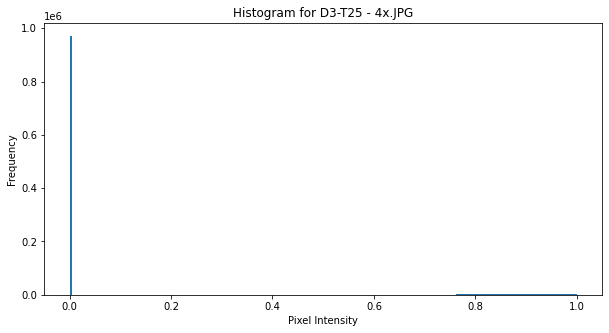

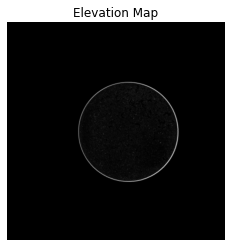

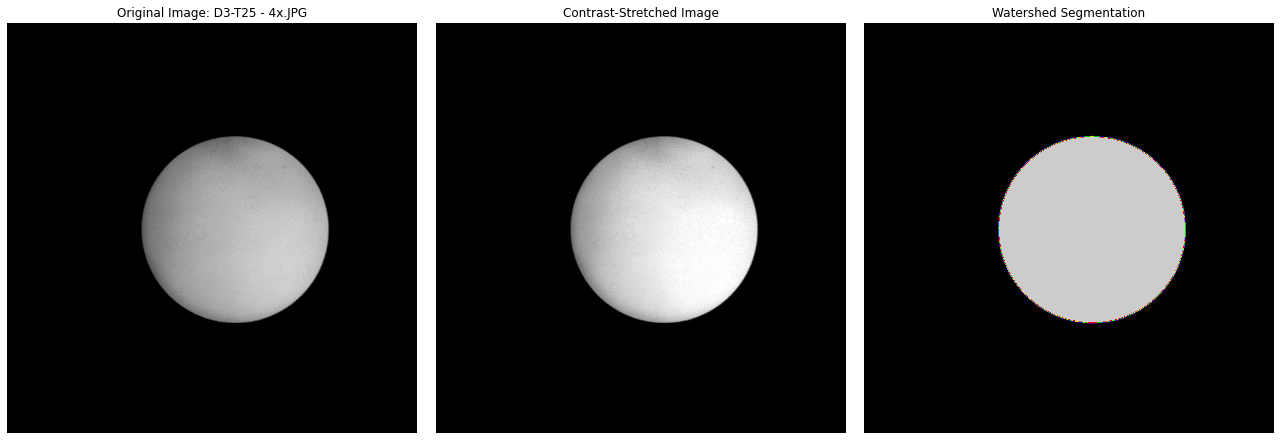

In [34]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, color, segmentation, exposure
from scipy import ndimage

# Function for contrast stretching
def contrast_stretching(image):
    """Apply contrast stretching to the image."""
    p2, p98 = np.percentile(image, (2, 98))  # Get the 2nd and 98th percentiles
    stretched = exposure.rescale_intensity(image, in_range=(p2, p98))  # Stretch the contrast
    return stretched

# Directory containing the images
directory = r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\Circular Crops\SiHa_Looping_Set'

# Get list of image files
image_files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

# Check if there are any images
if not image_files:
    print("No images found in the specified directory.")
else:
    for filename in image_files:
        img_path = os.path.join(directory, filename)
        
        # Load the image and convert to grayscale
        img = io.imread(img_path)
        gray_img = color.rgb2gray(img)

        # Apply contrast stretching
        stretched_img = contrast_stretching(gray_img)

        # Apply Gaussian filter to reduce noise
        smoothed_img = filters.gaussian(stretched_img, sigma=1)  # Adjust sigma as needed

        # Show histogram
        hist, hist_centers = exposure.histogram(smoothed_img)
        plt.figure(figsize=(10, 5))
        plt.hist(smoothed_img.ravel(), bins=256, range=[0, 1])  # Normalize range for grayscale
        plt.title(f'Histogram for {filename}')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.show()

        # Elevation Map
        elevation_map = filters.sobel(smoothed_img)
        plt.imshow(elevation_map, cmap='gray')
        plt.title('Elevation Map')
        plt.axis('off')
        plt.show()

        # Threshold segmentation
        markers = np.zeros_like(smoothed_img)
        markers[smoothed_img < 0.1] = 1  # Adjust threshold as necessary
        markers[smoothed_img > 0.9] = 2  # Adjust threshold as necessary
        segmentation_result = segmentation.watershed(elevation_map, markers)
        segmentation_result = ndimage.binary_fill_holes(segmentation_result - 1)
        labeled_cells, _ = ndimage.label(segmentation_result)

        # Display the original, stretched, and segmented images
        plt.figure(figsize=(18, 6))

        # Original image
        plt.subplot(1, 3, 1)
        plt.imshow(gray_img, cmap='gray')
        plt.title('Original Image: {}'.format(filename))
        plt.axis('off')

        # Stretched image
        plt.subplot(1, 3, 2)
        plt.imshow(stretched_img, cmap='gray')
        plt.title('Contrast-Stretched Image')
        plt.axis('off')

        # Segmented image
        plt.subplot(1, 3, 3)
        plt.imshow(labeled_cells, cmap='nipy_spectral')
        plt.title('Watershed Segmentation')
        plt.axis('off')

        plt.tight_layout()
        plt.show()